In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import os

In [23]:
path_train = 'DataSets/Covid19-dataset/train/'
path_test = 'DataSets/Covid19-dataset/test/'

In [24]:
classes = os.listdir(path_train)
classes

['Normal', 'Covid', 'Viral Pneumonia']

In [25]:
gen = ImageDataGenerator(rescale=(1/255))

In [26]:
x_train = gen.flow_from_directory(path_train, target_size=(512, 512), batch_size=8, class_mode='categorical')
x_test = gen.flow_from_directory(path_test, target_size=(512, 512), batch_size=1, class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [27]:
model = Sequential()

model.add(Input(shape=(512, 512, 3)))

model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(len(classes), activation='softmax'))

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [9]:
history = model.fit(x_train, epochs=15, validation_data=x_test, callbacks=[stop])

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4298 - loss: 1.1883 - val_accuracy: 0.7727 - val_loss: 0.5822
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8912 - loss: 0.2811 - val_accuracy: 0.9242 - val_loss: 0.2759
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9581 - loss: 0.1463 - val_accuracy: 0.8636 - val_loss: 0.2006
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9801 - loss: 0.0563 - val_accuracy: 0.9242 - val_loss: 0.4980
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9704 - loss: 0.1004 - val_accuracy: 0.9242 - val_loss: 0.1818


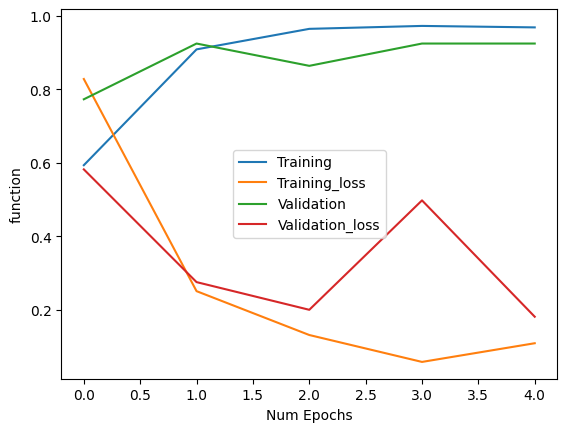

In [11]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('Num Epochs')
plt.ylabel('function')
plt.legend()
plt.show()

In [34]:
loss, accuracy = model.evaluate(x_test)
loss, accuracy

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.2551 - loss: 1.1117


(1.107707142829895, 0.3030303120613098)

In [60]:
image_test_Covid = 'DataSets/Covid19-dataset/train/Normal/012.jpeg'

In [39]:
class_map = dict([value, key] for key, value in x_train.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [18]:
model.save('Covid_Model.h5')

In [20]:
model.save('Covid_Model_test1.keras')

In [21]:
from tensorflow.keras.models import load_model

In [33]:
model_loaded = load_model('Covid_Model.h5')

In [35]:
loss, accuracy = model_loaded.evaluate(x_test)
loss, accuracy

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9506 - loss: 0.1369


(0.1817987710237503, 0.9242424368858337)

In [58]:
def prediction(test_image):
    test_img = image.load_img(test_image, target_size=(512, 512))
    img_arr = image.img_to_array(test_img)/255
    image_input = img_arr.reshape(1, img_arr.shape[0], img_arr.shape[1], img_arr.shape[2])
    pred_class = np.argmax(model_loaded.predict(image_input))
    pred_img = class_map[pred_class]
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img_arr)
    plt.title('Predicción:{}'.format(pred_img))    
    plt.grid()
    plt.axis('off')
    plt.show()
    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


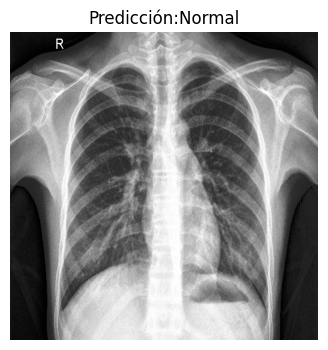

In [61]:
prediction(image_test_Covid)